# Read in data

In [43]:
import pandas as pd
spatial = pd.read_csv(r'/Users/romanowskih/OneDrive - Rothamsted Research/Desktop/Courses/Data science/Assement/Assesment_2/Bat_fake.csv')
spatial

,Date,Habitat,Direction,Distance,Suction_IB,Light_IB,Small_IB,Pass_length,Feeding_buzzes,Total_pip_passes,Pip_passes,Pyg_passes,Total_species,Temp,Wind,Rainfall
0,02/07/2021,W,NE,90,1.2459,3.5634,0.7070,0.704,12,11,8,3,1,16,7.6,N
1,14/05/2021,W,S,34,0.3746,3.9171,0.6431,1.544,12,15,5,10,3,10,7.0,N
2,23/05/2021,W,SW,106,0.6746,3.6372,0.2427,1.014,12,17,15,2,1,17,7.7,N
3,21/06/2021,W,E,55,0.9202,3.6465,0.9569,0.359,12,20,15,5,4,16,7.6,N
4,07/08/2021,W,W,38,1.0217,3.5899,0.9311,0.028,12,24,18,6,3,14,7.4,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,12/06/2021,O,NW,972,1.2729,2.9221,0.8602,0.000,0,0,0,0,0,10,7.0,Y
115,18/07/2021,O,NE,406,1.1620,2.7690,0.1470,0.000,0,0,0,0,0,18,7.8,Y
116,24/07/2021,O,N,234,0.8810,2.3048,0.7961,0.000,0,0,0,0,0,12,7.2,Y
117,25/07/2021,O,S,60,0.6738,3.6818,0.4661,0.000,0,0,0,0,0,12,7.2,Y


# Data adjustments 

In [ ]:
spatial.head()

Create a new column for total insect biomass across all 3 trap types (suction, light and small):

In [50]:
spatial["Total_IB"] = (spatial["Suction_IB"] + spatial["Light_IB"] + spatial["Small_IB"])
spatial["Total_IB"]

0      5.5163
1      4.9348
2      4.5545
3      5.5236
4      5.5427
        ...  
114    5.0552
115    4.0780
116    3.9819
117    4.8217
118    5.6206
Name: Total_IB, Length: 119, dtype: float64

Convert date from a string to an integer

In [ ]:
# Convert the date column to datetime format
spatial['Date']= pd.to_datetime(spatial['Date'])
 
# Check the format of date column
spatial.info()
spatial["Date"]

In [46]:
import time
from datetime import date
spatial["jan_1"] = date(2021,1,1)

#Convert the date column to datetime format
spatial["jan_1"]= pd.to_datetime(spatial["jan_1"])
 
# Check the format of 'Date' column
spatial.info()
spatial["jan_1"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              119 non-null    datetime64[ns]
 1   Habitat           119 non-null    object        
 2   Direction         119 non-null    object        
 3   Distance          119 non-null    int64         
 4   Suction_IB        119 non-null    float64       
 5   Light_IB          119 non-null    float64       
 6   Small_IB          119 non-null    float64       
 7   Pass_length       119 non-null    float64       
 8   Feeding_buzzes    119 non-null    int64         
 9   Total_pip_passes  119 non-null    int64         
 10  Pip_passes        119 non-null    int64         
 11  Pyg_passes        119 non-null    int64         
 12  Total_species     119 non-null    int64         
 13  Temp              119 non-null    int64         
 14  Wind              119 non-

0     2021-01-01
1     2021-01-01
2     2021-01-01
3     2021-01-01
4     2021-01-01
         ...    
114   2021-01-01
115   2021-01-01
116   2021-01-01
117   2021-01-01
118   2021-01-01
Name: jan_1, Length: 119, dtype: datetime64[ns]

In [47]:
#Create a column of number of days through the year
spatial["Days"] = (spatial["Date"] - spatial["jan_1"])
spatial

,Date,Habitat,Direction,Distance,Suction_IB,Light_IB,Small_IB,Pass_length,Feeding_buzzes,Total_pip_passes,Pip_passes,Pyg_passes,Total_species,Temp,Wind,Rainfall,jan_1,Days
0,2021-02-07,W,NE,90,1.2459,3.5634,0.7070,0.704,12,11,8,3,1,16,7.6,N,2021-01-01,37 days
1,2021-05-14,W,S,34,0.3746,3.9171,0.6431,1.544,12,15,5,10,3,10,7.0,N,2021-01-01,133 days
2,2021-05-23,W,SW,106,0.6746,3.6372,0.2427,1.014,12,17,15,2,1,17,7.7,N,2021-01-01,142 days
3,2021-06-21,W,E,55,0.9202,3.6465,0.9569,0.359,12,20,15,5,4,16,7.6,N,2021-01-01,171 days
4,2021-07-08,W,W,38,1.0217,3.5899,0.9311,0.028,12,24,18,6,3,14,7.4,N,2021-01-01,188 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-12-06,O,NW,972,1.2729,2.9221,0.8602,0.000,0,0,0,0,0,10,7.0,Y,2021-01-01,339 days
115,2021-07-18,O,NE,406,1.1620,2.7690,0.1470,0.000,0,0,0,0,0,18,7.8,Y,2021-01-01,198 days
116,2021-07-24,O,N,234,0.8810,2.3048,0.7961,0.000,0,0,0,0,0,12,7.2,Y,2021-01-01,204 days
117,2021-07-25,O,S,60,0.6738,3.6818,0.4661,0.000,0,0,0,0,0,12,7.2,Y,2021-01-01,205 days


In [48]:
spatial["Days"]

0      37 days
1     133 days
2     142 days
3     171 days
4     188 days
        ...   
114   339 days
115   198 days
116   204 days
117   205 days
118   218 days
Name: Days, Length: 119, dtype: timedelta64[ns]

Convert 'Distance' and 'Total_IB' to integer variables

In [137]:
spatial['Distance'].astype(str).astype(int)
spatial['Total_IB'].astype(int)
spatial.dtypes

Date                 datetime64[ns]
Habitat                      object
Direction                    object
Distance                      int64
Suction_IB                  float64
Light_IB                    float64
Small_IB                    float64
Pass_length                 float64
Feeding_buzzes                int64
Total_pip_passes              int64
Pip_passes                    int64
Pyg_passes                    int64
Total_species                 int64
Temp                          int64
Wind                        float64
Rainfall                      int64
jan_1                datetime64[ns]
Days                timedelta64[ns]
Total_IB                    float64
Bat_presence                  int64
dtype: object

Convert 'Rainfall' to binary instead of Y/N

In [52]:
spatial["Rainfall"] = spatial["Rainfall"].replace({'Y': 1, 'N': 0})
spatial["Rainfall"]

0      0
1      0
2      0
3      0
4      0
      ..
114    1
115    1
116    1
117    1
118    1
Name: Rainfall, Length: 119, dtype: int64

Create a new variable binary called 'Bat_presence' using 'Feeding_buzzes'

In [67]:
spatial["Bat_presence"] = spatial["Feeding_buzzes"]
spatial["Bat_presence"] = spatial["Bat_presence"].replace({1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1})

In [68]:
spatial["Bat_presence"].astype(str)

0      1
1      1
2      1
3      1
4      1
      ..
114    0
115    0
116    0
117    0
118    0
Name: Bat_presence, Length: 119, dtype: object

In [124]:
spatial.dtypes

Date                 datetime64[ns]
Habitat                      object
Direction                    object
Distance                      int64
Suction_IB                  float64
Light_IB                    float64
Small_IB                    float64
Pass_length                 float64
Feeding_buzzes                int64
Total_pip_passes              int64
Pip_passes                    int64
Pyg_passes                    int64
Total_species                 int64
Temp                          int64
Wind                        float64
Rainfall                      int64
jan_1                datetime64[ns]
Days                timedelta64[ns]
Total_IB                    float64
Bat_presence                  int64
dtype: object

# Data exploration

In [70]:
spatial.mean()

C:\Users\ROMANO~1\AppData\Local\Temp/ipykernel_784/2187106564.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  spatial.mean()
C:\Users\ROMANO~1\AppData\Local\Temp/ipykernel_784/2187106564.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  spatial.mean()


Distance                             448.243697
Suction_IB                             1.007263
Light_IB                               2.893657
Small_IB                               0.508022
Pass_length                            1.020235
Feeding_buzzes                         4.747899
Total_pip_passes                           26.0
Pip_passes                             18.92437
Pyg_passes                             5.806723
Total_species                          2.386555
Temp                                  13.596639
Wind                                   7.359664
Rainfall                               0.168067
Days                179 days 04:50:25.210084034
Total_IB                               4.408942
Bat_presence                            0.89916
dtype: object

In [71]:
spatial["Total_IB"].max()

5.9563

This tells us that the maximum insect biomass when totalled across all 3 traps was 5.96g

<AxesSubplot:>

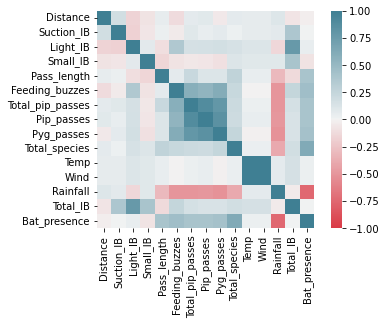

In [72]:
import seaborn as sns
corr = spatial.corr()
# We define a diverging colourmap so that 0.0 is white
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

In [80]:
spatial.corr()

,Distance,Suction_IB,Light_IB,Small_IB,Pass_length,Feeding_buzzes,Total_pip_passes,Pip_passes,Pyg_passes,Total_species,Temp,Wind,Rainfall,Total_IB,Bat_presence
Distance,1.000000,0.173038,-0.166360,-0.084688,0.050553,-0.124068,0.065501,0.080839,-0.048370,0.063045,0.059381,0.059381,0.102532,-0.075116,-0.028089
Suction_IB,0.173038,1.000000,-0.179229,-0.067869,0.030143,-0.042514,0.092500,0.046234,0.065856,0.015974,0.055334,0.055334,0.077881,0.377678,0.006231
Light_IB,-0.166360,-0.179229,1.000000,0.077862,-0.104255,0.359892,0.154304,0.163419,0.164548,0.145721,0.110143,0.110143,-0.141370,0.767598,0.040629
Small_IB,-0.084688,-0.067869,0.077862,1.000000,-0.148711,-0.082654,-0.057839,-0.070236,-0.099772,0.110584,0.089592,0.089592,0.087261,0.398840,-0.082022
Pass_length,0.050553,0.030143,-0.104255,-0.148711,1.000000,0.069271,0.223528,0.116914,0.114311,0.273194,0.041684,0.041684,-0.309885,-0.125869,0.402299
Feeding_buzzes,-0.124068,-0.042514,0.359892,-0.082654,0.069271,1.000000,0.578566,0.537336,0.602915,0.227852,-0.001124,-0.001124,-0.502407,0.247336,0.450187
Total_pip_passes,0.065501,0.092500,0.154304,-0.057839,0.223528,0.578566,1.000000,0.887986,0.793878,0.208177,0.024495,0.024495,-0.504122,0.158967,0.405222
Pip_passes,0.080839,0.046234,0.163419,-0.070236,0.116914,0.537336,0.887986,1.000000,0.836399,0.202709,0.039657,0.039657,-0.496924,0.136416,0.399825
Pyg_passes,-0.048370,0.065856,0.164548,-0.099772,0.114311,0.602915,0.793878,0.836399,1.000000,0.244447,-0.012029,-0.012029,-0.520956,0.137252,0.424724
Total_species,0.063045,0.015974,0.145721,0.110584,0.273194,0.227852,0.208177,0.202709,0.244447,1.000000,0.037860,0.037860,-0.395812,0.171963,0.619258


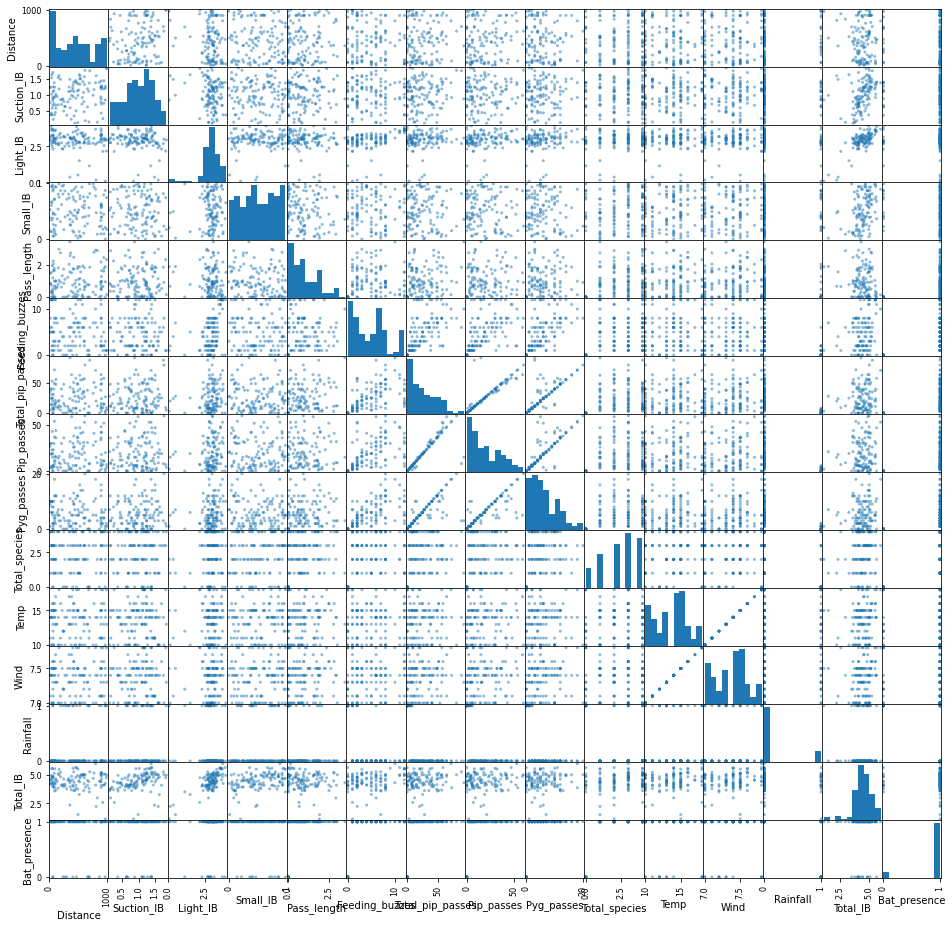

In [73]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(spatial, figsize=(16, 16))

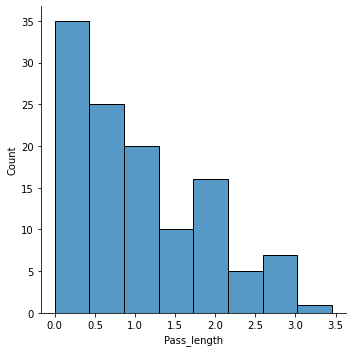

In [79]:
sns.displot(data=spatial, x="Pass_length", stat="density", common_norm=False)

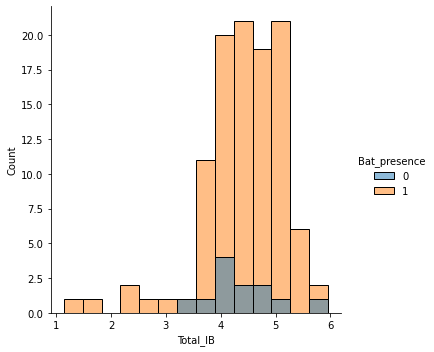

In [83]:
sns.displot(data=spatial, x="Total_IB", hue = "Bat_presence", common_norm=False)

In [ ]:
sns.displot(data=spatial, x="Pip_passes", stat="density", common_norm=False)

In [ ]:
sns.displot(data=spatial, x="Pip_passes", kind="kde", common_norm=False)

In [ ]:
sns.displot(data=spatial, x="Pyg_passes", kind="kde", common_norm=False)

In [ ]:
sns.catplot(data=spatial, x="Site", y="Total_IB")

Create a figure of all boxplots for habitat

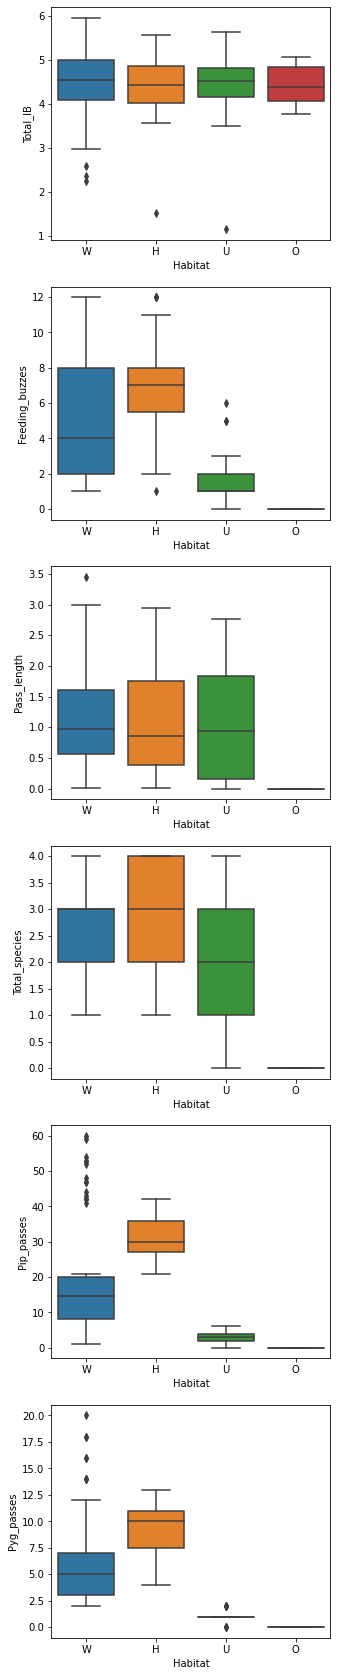

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 6 axes - each size 5 by 30
fig, axes_list = plt.subplots(6, figsize=(5, 30))

#Define all the variables for y axis of boxplot
predictors = ["Total_IB", "Feeding_buzzes", "Pass_length", "Total_species", "Pip_passes", "Pyg_passes"]

#for each of the variables going down the column, plot a boxplot with x axis as 'Habitat' and y as predictors defined earlier
for ax, col in zip(axes_list, predictors):
    sns.boxplot(data=spatial, x="Habitat", y=col, ax=ax)

# Data analysis

In [93]:
from sklearn.model_selection import train_test_split

X = spatial[["Total_IB"]]
y = spatial["Feeding_buzzes"]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

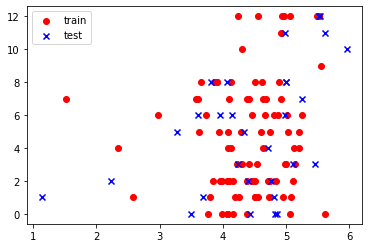

In [94]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

 Model gradient:  0.6883009020023111
Model intercept: 1.6243601507382626


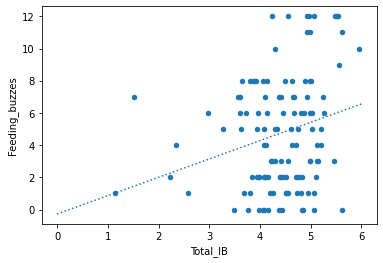

In [95]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
spatial.plot.scatter("Total_IB", "Feeding_buzzes", ax=ax)
ax.plot(x_fit["Total_IB"], y_pred, linestyle=":")

print(" Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [96]:
model.score(test_X, test_y)

0.1255028580066262

Linear regression for Total_IB and Total_pip_passes

In [97]:
X = spatial[["Total_IB"]]
y = spatial["Total_pip_passes"]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

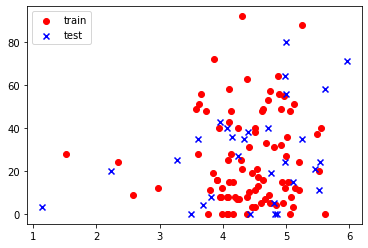

In [98]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

 Model gradient:  1.7654618185166855
Model intercept: 17.594593241019506


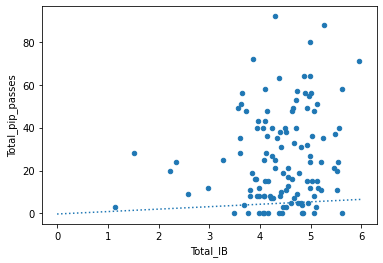

In [99]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
spatial.plot.scatter("Total_IB", "Total_pip_passes", ax=ax)
ax.plot(x_fit["Total_IB"], y_pred, linestyle=":")

print(" Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [100]:
model.score(test_X, test_y)

0.03967102593935112

Linear regression for Total_IB and Total_species

In [101]:
X = spatial[["Total_IB"]]
y = spatial["Total_species"]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

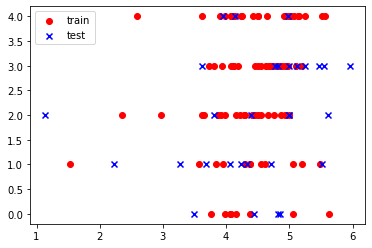

In [102]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

 Model gradient:  0.30119547703292976
Model intercept: 1.203354342616234


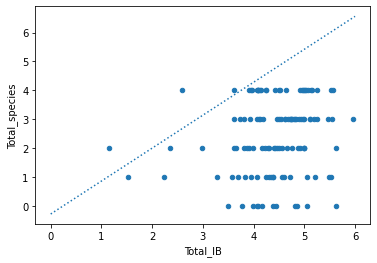

In [103]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
spatial.plot.scatter("Total_IB", "Total_species", ax=ax)
ax.plot(x_fit["Total_IB"], y_pred, linestyle=":")

print(" Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [104]:
model.score(test_X, test_y)

-0.16255337004642878

In [105]:
X = spatial[["Light_IB"]]
y = spatial["Total_species"]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

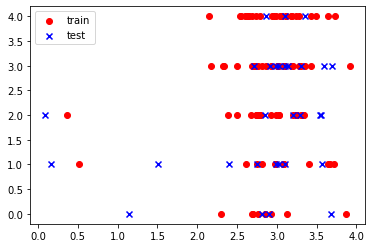

In [106]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

 Model gradient:  0.15093430151999443
Model intercept: 2.0872657397698635


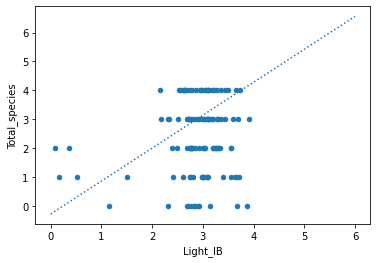

In [107]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
spatial.plot.scatter("Light_IB", "Total_species", ax=ax)
ax.plot(x_fit["Total_IB"], y_pred, linestyle=":")

print(" Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [108]:
model.score(test_X, test_y)

-0.14807187578144032

In [109]:
X = spatial[["Light_IB"]]
y = spatial["Total_pip_passes"]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

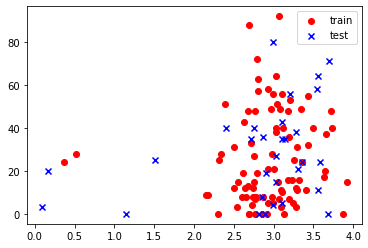

In [110]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

 Model gradient:  2.8167248529934152
Model intercept: 17.132922680644853


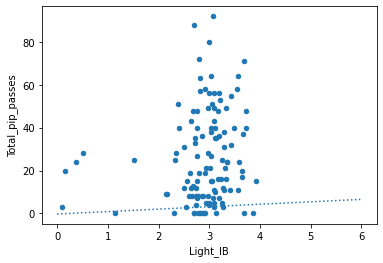

In [111]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
spatial.plot.scatter("Light_IB", "Total_pip_passes", ax=ax)
ax.plot(x_fit["Total_IB"], y_pred, linestyle=":")

print(" Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [112]:
model.score(test_X, test_y)

0.04454374753396384

# Further analysis

Using a PCA to see which variables explain the variation in number of pipistrellus species passes (aka bat activity)

In [146]:
from sklearn.preprocessing import StandardScaler

features = ['Suction_IB', 'Small_IB', 'Light_IB', 'Temp']
x = spatial.loc[:, features].values

In [147]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, spatial[['Total_pip_passes']]], axis = 1)

In [148]:
print('Explained variation per principal component:{}'.format(pca.explained_variance_ratio_))
print(abs( pca.components_ ))

Explained variation per principal component:[0.89084704 0.06851034]
[[0.01006742 0.0111512  0.03271038 0.99935195]
 [0.2080988  0.04089403 0.97678174 0.03033155]]
